[the link to the tutorial](https://github.com/dphi-official/Data_Science_Bootcamp/blob/master/Week2/Introduction_to_Imbalanced_class.ipynb)

## This tutorial deals with class imbalance problems

In [1]:
import pandas as pd
import numpy as np
import random
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

#this prevents warning in the notebook
import warnings
warnings.filterwarnings('ignore')

## Loading fraud data set

In [2]:
df  = pd.read_csv('fraud_data.csv')

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,credit,269.0,87.0,NaN,NaN,yahoo.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.791666,0.791666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,15.0,136.0,0.0,0.0,0.0,0.0,1822.0,47.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,15951.99023,198853.7656,0.0,0.0,0.0,915.0,5975.0,1320.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82050.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,NaN,529.0,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10.12,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,151230

In [5]:
# Taking a look at the target variable
df['isFraud'].value_counts()

0    57049
1     2005
Name: isFraud, dtype: int64

In [6]:
# to get the percentage of unique values in the variable isfraud
df['isFraud'].value_counts()/len(df) * 100

# about 96% are not fraud transaction, while just 3.4% are fraud transaction

0    96.604802
1     3.395198
Name: isFraud, dtype: float64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

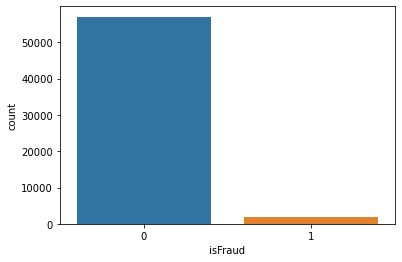

In [7]:
# Using seaborn countplot to visualize the data graphically
sns.countplot(df['isFraud'])

There are only about 97% not fraud transactions and 3% fraud transaction, this is an imbalanced data set which we have to look into

## Missing values

In [8]:
# To find the percentage of missing values in the data set
df.isnull().sum()/len(df) * 100

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
card1              0.000000
card2              1.549429
card3              0.267552
card4              0.274325
card5              0.751854
card6              0.269245
addr1             11.392962
addr2             11.392962
dist1             59.865547
dist2             93.443289
P_emaildomain     15.934568
R_emaildomain     76.572290
C1                 0.000000
C2                 0.000000
C3                 0.000000
C4                 0.000000
C5                 0.000000
C6                 0.000000
C7                 0.000000
C8                 0.000000
C9                 0.000000
C10                0.000000
C11                0.000000
C12                0.000000
C13                0.000000
C14                0.000000
D1                 0.204897
D2                47.336336
D3                44.391574
D4                28.526433
D5                52

## Dealing with missing values

**.** Filling missing values with the right techniques can change or results drastically
**.** There is no fixed rule for filling missing values
**.** No method is perfect for filling missing values, we need to use logic and our common sense

Eliminating column with more than 20% missing values

In [9]:
df['card2'].isnull().sum()/59054

0.015494293358620924

In [10]:
df = df[df.columns[df.isnull().mean() < 0.2]]
# this will keep columns with missing values that are less than 20%

filling the columns of numerical values with mean


In [11]:
num_col = df.select_dtypes(include=np.number).columns # getting all the numerical columns

#filling the numerical columns with mean value
df[num_col] = df[num_col].fillna(df[num_col].mean())

filling categorical column values with mode

In [12]:
# getting the categorical columns
cat_col = df.select_dtypes(include='object').columns

# filling categorical variables with mode
df[cat_col] = df[cat_col].fillna(df[cat_col].mode().iloc[0]) # iloc is used to select the first most occuring data in case there 
# is more than one set of data occuring the most.

## One hot encoding (creating dummies for categorical columns)

In [13]:
# using pandas get_dummies() method to encode all the categorical columns
df = pd.get_dummies(data = df, columns=cat_col)

In [14]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,P_emaildomain_centurylink.net,P_emaildomain_cfl.rr.com,P_emaildomain_charter.net,P_emaildomain_comcast.net,P_emaildomain_cox.net,P_emaildomain_earthlink.net,P_emaildomain_embarqmail.com,P_emaildomain_frontier.com,P_emaildomain_frontiernet.net,P_emaildomain_gmail,P_emaildomain_gmail.com,P_emaildomain_gmx.de,P_emaildomain_hotmail.co.uk,P_emaildomain_hotmail.com,P_emaildomain_hotmail.de,P_emaildomain_hotmail.es,P_emaildomain_hotmail.fr,P_emaildomain_icloud.com,P_emaildomain_juno.com,P_emaildomain_live.com,P_emaildomain_live.com.mx,P_emaildomain_live.fr,P_emaildomain_mac.com,P_emaildomain_mail.com,P_emaildomain_me.com,P_emaildomain_msn.com,P_emaildomain_netzero.com,P_emaildomain_netzero.net,P_emaildomain_optonline.net,P_emaildomain_outlook.com,P_emaildomain_outlook.es,P_emaildomain_prodigy.net.mx,P_emaildomain_protonmail.com,P_emaildomain_ptd.net,P_emaildomain_q.com,P_emaildomain_roadrunner.com,P_emaildomain_rocketmail.com,P_emaildomain_sbcglobal.net,P_emaildomain_sc.rr.com,P_emaildomain_servicios-ta.com,P_emaildomain_suddenlink.net,P_emaildomain_twc.com,P_emaildomain_verizon.net,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,2994681,0,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.0,124.267325,163.966616,0.55965,0.597624,0.999398,0.124619,0.125551,0.137374,0.13883,0.814731,0.845542,0.133239,0.135394,1.035702,1.058825,0.977247,0.987245,0.000621,0.000679,0.383778,0.402532,0.143839,0.145334,0.133375,0.141354,0.577891,0.619606,1.069064,1.12127,0.130224,0.13437,0.135635,0.144103,0.830144,0.866973,0.132482,0.143577,0.999533,0.981138,0.998521,0.000467,0.387344,0.405077,0.14276,0.147354,0.142585,0.154809,0.544799,0.587851,1.086124,1.142315,0.138761,0.14557,0.154416,0.842309,0.880149,0.13912,0.1516,1.064179,1.098444,0.999081,0.000779,0.397033,0.416123,0.151521,0.155714,0.13952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,3557242,0,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,1,4,0,0,0,1,0,0,3,0,3,0,4,1,63.0,4.000000,4.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000

## Seperating input and target features

In [15]:
X = df.drop(columns='isFraud', axis=1) #input features
y = df['isFraud'] # output feature

## Standardization/Normalization
It's the process of bringing all the variables in a dataset to a common scale

'StandardScaler' of sklearn.preprocessing is always used for this purpose

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns = X.columns

In [18]:
# seeing the scaled result
scaled_features.head()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_american express,card4_discover,card4_mastercard,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_aim.com,P_emaildomain_anonymous.com,P_emaildomain_aol.com,P_emaildomain_att.net,P_emaildomain_bellsouth.net,P_emaildomain_cableone.net,P_emaildomain_centurylink.net,P_emaildomain_cfl.rr.com,P_emaildomain_charter.net,P_emaildomain_comcast.net,P_emaildomain_cox.net,P_emaildomain_earthlink.net,P_emaildomain_embarqmail.com,P_emaildomain_frontier.com,P_emaildomain_frontiernet.net,P_emaildomain_gmail,P_emaildomain_gmail.com,P_emaildomain_gmx.de,P_emaildomain_hotmail.co.uk,P_emaildomain_hotmail.com,P_emaildomain_hotmail.de,P_emaildomain_hotmail.es,P_emaildomain_hotmail.fr,P_emaildomain_icloud.com,P_emaildomain_juno.com,P_emaildomain_live.com,P_emaildomain_live.com.mx,P_emaildomain_live.fr,P_emaildomain_mac.com,P_emaildomain_mail.com,P_emaildomain_me.com,P_emaildomain_msn.com,P_emaildomain_netzero.com,P_emaildomain_netzero.net,P_emaildomain_optonline.net,P_emaildomain_outlook.com,P_emaildomain_outlook.es,P_emaildomain_prodigy.net.mx,P_emaildomain_protonmail.com,P_emaildomain_ptd.net,P_emaildomain_q.com,P_emaildomain_roadrunner.com,P_emaildomain_rocketmail.com,P_emaildomain_sbcglobal.net,P_emaildomain_sc.rr.com,P_emaildomain_servicios-ta.com,P_emaildomain_suddenlink.net,P_emaildomain_twc.com,P_emaildomain_verizon.net,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,-1.688548,-1.544958,-0.468203,-0.021940,1.412632,-0.286861,0.653753,-0.225982,0.077832,-0.099186,-0.092969,-0.034155,-0.057671,-0.214317,-0.113785,-0.043835,-0.040593,-0.266499,-0.041472,-0.098587,-0.044784,-0.246816,-0.149534,-0.598309,-8.312926e-17,-1.524289e-16,-2.328077e-16,0.000000,-4.847131e-15,0.000000,0.000000,8.149510e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.454269e-16,0.000000,4.659023e-18,0.000000,0.000000,2.146385e-16,-8.307865e-17,0.000000,-8.653189e-17,0.000000,0.000000,-2.223095e-16,0.000000,0.000000,0.000000,-7.940419e-17,0.000000,-7.213805e-17,-2.711022e-16,-2.462179e-16,0.000000,0.000000,0.000000,0.000000,0.000000,2.689681e-18,0.000000,-1.075699e-16,0.000000,7.606654e-17,0.000000,0.000000,0.000000,0.000000,4.552978e-16,-3.225324e-16,0.000000,0.00000,0.000000,2.874771e-16,2.595550e-16,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.146690e-16,-8.059233e-17,7.558164e-17,0.000000,-0.052747,-0.076055,-0.064203,-0.219473,-0.321400,-0.284761,-0.046934,-0.053281,-0.052401,-0.130312,-0.084949,-0.091808,0.020175,-0.058224,-0.118337,-0.083695,-0.037824,-0.064312,-0.047689,-0.083654,-0.172014,-0.116777,-0.012049,-0.036942,-0.019335,-0.019334,-0.064785,-0.036083,-0.137572,-0.250122,-0.18303,-0.058441,-0.080639,-0.069751,-0.062384,-0.272160,-0.169041,-0.049289,-0.05641,-0.055166,-0.063096,-0.089749,-0.081301,-0.056153,-0.071415,-0.172908,0.197219,0.007398,-0.261503,-0.348683,-0.163412,-0.330457,-0.427374,-0.394564,-0.15987

## Splitting the data into training and testing set

In [19]:
# Splitting the data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

## Dealing with imbalanced data set
Most machine leanrning models work best when the number of samples in the classes are about equal

## Different Techniques
1. **Resampling Techniques - Oversample Minority Class:** 
Oversampling can be defined as adding more copies of the minority class. In other words, we are creating artificial/synthetic data of the minority class (or group). Oversampling could be a good choice when you don’t have a lot of data to work with

We will use the **resampling module from Scikit-Learn library** to randomly create artificial samples of data from the minority class

** Note:** BEFORE you try any oversampling techniques you must split your data into train and test datasets!

In [20]:
# resample can be found in sklearn.utils
from sklearn.utils import resample

In [21]:
# concatenate the training data back together
train_data = pd.concat([X_train,y_train], axis=1)

In [22]:
# seperating minority and majority class
not_fraud = train_data[train_data['isFraud'] == 0]
is_fraud = train_data[train_data['isFraud'] == 1]

In [26]:
# oversampling the minority class to fit in to the number of the majority class
upsampled = resample(is_fraud,
                     replace = True,
                    n_samples = len(not_fraud),
                    random_state= 27)

In [29]:
# combine the sampled minority class with the majority class
upsampled = pd.concat([not_fraud, upsampled])

**Resampling Techniques - Undersample Majority Class:**  Undersampling can be defined as removing some observations of the majority class.undersampling may be good when we have millions of rows, but we are removing valuable data.

In [32]:
# downsampling the majority class
not_fraud_downsampled = resample(not_fraud, replace=False, n_samples = len(is_fraud),random_state = 27)

In [33]:
# combining the minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, is_fraud])

**Generate Synthetic Samples:** Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

In [35]:
# importing SMOTE 
# firstly need to install imblearn module using 'conda install -c conda-forge imbalanced-learn'
from imblearn.over_sampling import SMOTE

In [38]:
sm = SMOTE(random_state=25,sampling_strategy = 1.0)

In [39]:
# fit the sampling
X_train, y_train = sm.fit_sample(X_train,y_train)